In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 268 kB 58.4 MB/s 
     |████████████████████████████████| 1.3 MB 56.6 MB/s 
     |████████████████████████████████| 25.9 MB 71.7 MB/s 
     |████████████████████████████████| 636 kB 20.0 MB/s 
     |████████████████████████████████| 2.0 MB 51.0 MB/s 
     |████████████████████████████████| 134 kB 48.3 MB/s 
     |████████████████████████████████| 167 kB 50.3 MB/s 
     |████████████████████████████████| 10.4 MB 10.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 3.3 MB 44.7 MB/s 
     |████████████████████████████████| 17.0 MB 58.8 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 1.7 MB 46.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  I

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# New Section

In [3]:
from pycaret.datasets import get_data
import pandas as pd

In [4]:
file = '/content/drive/MyDrive/DataMining_Datasets/bodyPerformance.csv'
data = pd.read_csv(file)
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import jinja2

In [7]:
data.shape

(13393, 12)

In [8]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)

#data.reset_index(inplace=True, drop=True)
#data_unseen.reset_index(inplace = True, drop = True)

print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (12054, 12)
unseen data for predictions (1339, 12)


In [10]:
from pycaret.classification import *

In [11]:
multiclass = setup(data = data_set, target = 'class', session_id = 1)

,Description,Value
0,session_id,1
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(12054, 12)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
#compare_models()
#commenting since it takes a lot of time 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7462,0.9198,0.7462,0.7517,0.7460,0.6616,0.6633,0.792
rf,Random Forest Classifier,0.7256,0.9092,0.7257,0.7289,0.7250,0.6341,0.6354,1.573
et,Extra Trees Classifier,0.7202,0.9031,0.7202,0.7240,0.7189,0.6268,0.6287,1.094
gbc,Gradient Boosting Classifier,0.7199,0.9038,0.7199,0.7274,0.7197,0.6264,0.6288,5.456
qda,Quadratic Discriminant Analysis,0.6769,0.8808,0.6770,0.6869,0.6800,0.5691,0.5699,0.027
dt,Decision Tree Classifier,0.6354,0.7569,0.6358,0.6357,0.6351,0.5139,0.5141,0.071
lda,Linear Discriminant Analysis,0.6128,0.8499,0.6130,0.6176,0.6140,0.4836,0.4842,0.035
lr,Logistic Regression,0.6084,0.8474,0.6087,0.6053,0.6062,0.4778,0.4782,3.570
ada,Ada Boost Classifier,0.5938,0.7284,0.5936,0.6029,0.5952,0.4582,0.4596,0.404
knn,K Neighbors Classifier,0.5632,0.7922,0.5629,0.5887,0.5637,0.4173,0.4223,0.155


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
lightgbm_ = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7737,0.9259,0.7735,0.7769,0.7724,0.6982,0.7001
1,0.7500,0.9237,0.7500,0.7528,0.7487,0.6666,0.6682
2,0.7607,0.9212,0.7606,0.7670,0.7620,0.6808,0.6819
3,0.7417,0.9121,0.7417,0.7514,0.7438,0.6555,0.6571
4,0.7382,0.9225,0.7380,0.7447,0.7377,0.6508,0.6531
5,0.7322,0.9213,0.7325,0.7357,0.7317,0.6429,0.6443
6,0.7180,0.9069,0.7179,0.7290,0.7189,0.6238,0.6264
7,0.7544,0.9208,0.7542,0.7565,0.7530,0.6725,0.6739
8,0.7343,0.9174,0.7343,0.7381,0.7330,0.6456,0.6476


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [13]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6066,0.7377,0.6068,0.6070,0.6065,0.4755,0.4757
1,0.6588,0.7725,0.6590,0.6585,0.6583,0.5450,0.5452
2,0.6315,0.7543,0.6317,0.6273,0.6287,0.5087,0.5091
3,0.6303,0.7535,0.6305,0.6348,0.6322,0.5071,0.5072
4,0.6291,0.7527,0.6294,0.6342,0.6309,0.5055,0.5060
5,0.6363,0.7574,0.6370,0.6328,0.6341,0.5151,0.5153
6,0.6528,0.7684,0.6531,0.6567,0.6543,0.5371,0.5372
7,0.6548,0.7698,0.6551,0.6571,0.6559,0.5397,0.5398
8,0.6263,0.7508,0.6268,0.6227,0.6240,0.5017,0.5021


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [14]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 270 kB 61.2 MB/s 
     |████████████████████████████████| 112 kB 56.3 MB/s 
     |████████████████████████████████| 212 kB 49.5 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 45.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 856 kB 35.6 MB/s 
     |████████████████████████████████| 4.0 MB 46.

In [15]:
create_app(lightgbm_)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
5854   23.0      F      161.4      53.52        23.5       79.0     109.0   
13018  27.0      M      180.3     102.40        32.8       78.0     134.0   
2376   27.0      M      172.2      69.40        14.1       96.0     144.0   
1624   37.0      F      164.8      72.70        31.4       52.0     101.0   
5405   33.0      M      177.7      82.76        18.2       86.0     148.0   
...     ...    ...        ...        ...         ...        ...       ...   
6206   25.0      M      170.9      73.40        20.2       83.0     123.0   
2110   34.0      M      171.2      88.50        27.4       81.0     149.0   
6781   49.0      M      156.6      64.60        31.0       88.0     146.0   
4042   61.0      F      153.8      52.30        28.0       80.0     124.0   
4

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://27011.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f954d7c6a50>,
 'http://127.0.0.1:7860/',
 'https://27011.gradio.app')

In [ ]:
tuned_lightgbm = tune_model(lightgbm_)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9213,0.7499,0.7516,0.7495,0.6666,0.6674
1,0.7299,0.9165,0.7298,0.7346,0.7297,0.6397,0.6412
2,0.7429,0.9155,0.7428,0.7457,0.7425,0.6571,0.6582
3,0.7227,0.9081,0.7227,0.7325,0.7251,0.6302,0.6316
4,0.7370,0.9150,0.7368,0.7425,0.7366,0.6492,0.6510
5,0.7145,0.9150,0.7149,0.7165,0.7138,0.6192,0.6202
6,0.7085,0.9003,0.7085,0.7138,0.7083,0.6112,0.6128
7,0.7295,0.9141,0.7294,0.7336,0.7300,0.6393,0.6401
8,0.7260,0.9110,0.7260,0.7293,0.7248,0.6345,0.6362


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


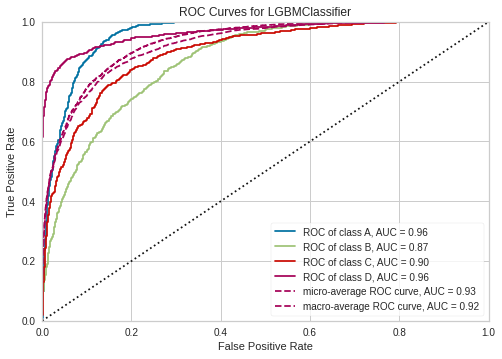

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'auc')

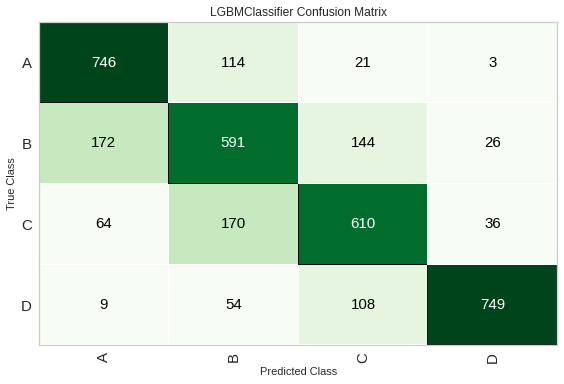

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

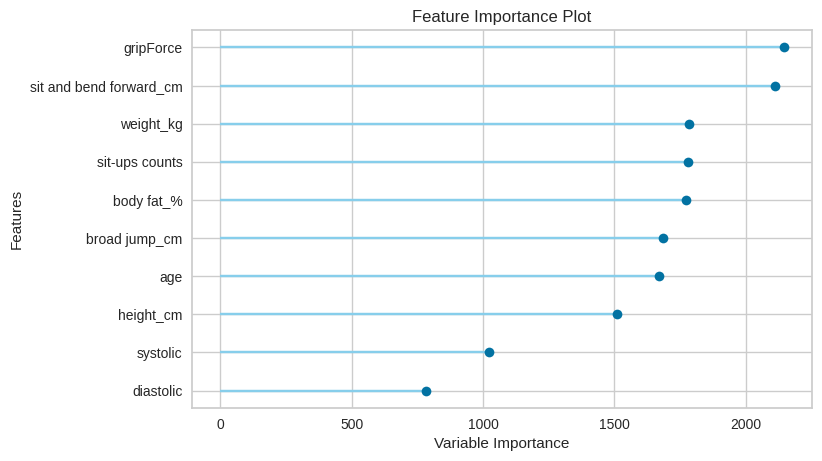

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

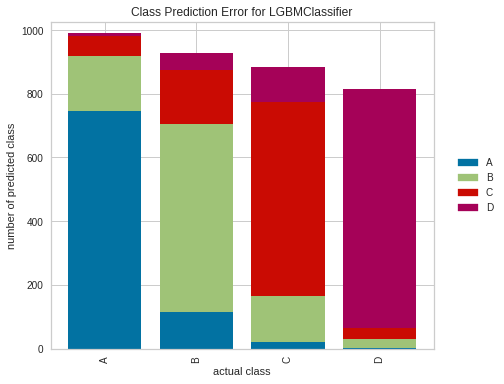

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='error')

In [ ]:
final_model = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
          

In [ ]:
test_prediction = predict_model(final_model, data = data_unseen)
test_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.9227,0,0,0,0,0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Label,Score
5,36.0,F,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,B,0.8455
18,26.0,M,169.2,70.6,21.0,63.0,129.0,41.3,15.1,53.0,225.0,B,A,0.4576
37,31.0,M,177.5,79.5,23.0,90.0,148.0,51.2,18.4,62.0,208.0,A,A,0.3748
39,27.0,M,177.6,79.7,22.8,59.0,108.0,48.0,1.8,59.0,219.0,D,D,0.9993
57,58.0,F,146.5,46.4,32.9,71.0,127.0,18.7,17.4,20.0,111.0,C,B,0.5167


In [ ]:
save_model(final_model,'Final_Multiclass_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=Final_Multiclass_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                             

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                 colsample_bytree=1.0, feature_fraction=0.6,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=100,
                                 min_child_weight=

In [ ]:
saved_model = load_model('Final_Multiclass_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_Multiclass_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_model, data = data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_sample

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.9227,0,0,0,0,0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Label,Score
5,36.0,F,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,B,0.8455
18,26.0,M,169.2,70.6,21.0,63.0,129.0,41.3,15.1,53.0,225.0,B,A,0.4576
37,31.0,M,177.5,79.5,23.0,90.0,148.0,51.2,18.4,62.0,208.0,A,A,0.3748
39,27.0,M,177.6,79.7,22.8,59.0,108.0,48.0,1.8,59.0,219.0,D,D,0.9993
57,58.0,F,146.5,46.4,32.9,71.0,127.0,18.7,17.4,20.0,111.0,C,B,0.5167


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction['class'], new_prediction['Label'], metric = 'Accuracy')
#can evaluate a model

0.7431